In [4]:
import numpy as np
import os
import pickle

## Concatenated minutia+texutre feature load

In [5]:
folder_dir = "/home/rs/21CS91R01/research/2023_ICVGIP-Code/van_minutiae_feature_fvc2006db2a"

# load all files into a dict
# key: filestem, value: feature vector
concat_feature_dict = {}
for file in os.listdir(folder_dir):
    if file.endswith(".txt.npy"):
        filestem = file.split(".")[0]
        loaded_concatenated_features = np.load(os.path.join(folder_dir, file))
        concat_feature_dict[filestem] = loaded_concatenated_features.flatten()

In [6]:
concat_feature_dict["1_1"].shape

(1024,)

## Minutia Feature Load

In [7]:
# features_dict={}  
with open("/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/features_dict_fvc2006_db2a_512.pkl", "rb") as file:
    minutia_feature_dict = pickle.load(file)

In [8]:
# flatten each feature vector
minutia_feature_dict = {i: minutia_feature_dict[i].flatten() for i in minutia_feature_dict.keys()}


In [9]:
minutia_feature_dict["1_1"].shape

(512,)

## Texture feature Load

In [10]:
import torch

texture_feature_dict = torch.load('/home/rs/21CS91R01/research/2023_ICVGIP-Code/baseline1/van_features_fvc2006DB2A.pt')

# rename key of texture_feature_dict - remove .bmp from key
texture_feature_dict = {key[:-4]: np.array(value) for key, value in texture_feature_dict.items()}


In [11]:

texture_feature_dict['1_1'].shape
# for key, value in dic.items():
#     print(key,(value))
#     break

(512,)

In [15]:
import numpy as np

# Define two feature vectors as NumPy arrays
# vector1 = np.array(vanmin1)  # Replace ... with the remaining values
# vector2 = np.array(vanmin2)  # Replace ... with the remaining values

# vector1 = np.array(feature1.flatten())  # Replace ... with the remaining values
# vector2 = np.array(feature2.flatten())  # Replace ... with the remaining values

# vector1 = np.array(feat1)  # Replace ... with the remaining values
# vector2 = np.array(feat2)  # Replace ... with the remaining values
import math

from scipy import spatial

def calculate_cosine_distance(a, b):
    cosine_distance = float(spatial.distance.cosine(a, b))
    return cosine_distance
    
def calculate_cosine_similarity(a, b):
    cosine_similarity = 1 - calculate_cosine_distance(a, b)
    return cosine_similarity
# Calculate the Euclidean distance
def euclidean_distance(vector1, vector2):
    # Ensure that both vectors have the same dimensions
    if len(vector1) != len(vector2):
        raise ValueError("Vectors must have the same dimensions")

    # Calculate the squared differences between elements
    squared_diff = (vector1 - vector2) ** 2

    # Sum the squared differences
    sum_squared_diff = np.sum(squared_diff)

    # Take the square root to get the Euclidean distance
    distance = np.sqrt(sum_squared_diff)

    return distance

# # Calculate the Euclidean distance between the two feature vectors
# distance = euclidean_distance(vector1, vector2)

# print("Euclidean Distance:", distance)


## Distribution of all euclidean distances of all fingerprint pairs from the same finger

In [16]:
# plot distance matrix with values also displayed in matrix
import matplotlib.pyplot as plt
def plot_distance_mat(distance_mat):
    plt.figure(figsize=(4, 3))
    # plt.imshow(distance_mat)
    heatmap = plt.imshow(distance_mat, cmap='viridis')
    for i in range(distance_mat.shape[0]):
        for j in range(distance_mat.shape[1]):
            plt.text(j, i, f'{distance_mat[i, j]:.1f}', ha='center', va='center', color='black', fontsize=6)
    plt.colorbar(heatmap)
    plt.show()

In [17]:
# create distance matrix for each impression pair
def plot_distance(p1,p2,feature_vector,T):
    n_impr = 12
    n_fing = len(concat_feature_dict) // n_impr
    distance_mat = np.zeros((n_impr, n_impr))
    f1 = p1
    f2 = p2
    for i in range(n_impr):
        for j in range(n_impr):
            imp_1 = f"{f1}_{i+1}"
            imp_2 = f"{f2}_{j+1}"
            distance_mat[i, j] = euclidean_distance(feature_vector[imp_1], feature_vector[imp_2])
    print("".center(50, "="))
    print(f"{T} Distance Matrix for {p1} and {p2}:", )
    plot_distance_mat(distance_mat)
    return distance_mat

## Test for all fingerprint pairs from different methods

In [18]:
p1,p2 = 9,15

9 vs 9 texture Distance Matrix for 9 and 9:


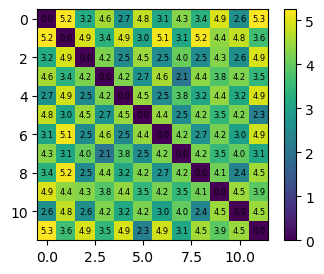

15 vs 15 texture Distance Matrix for 15 and 15:


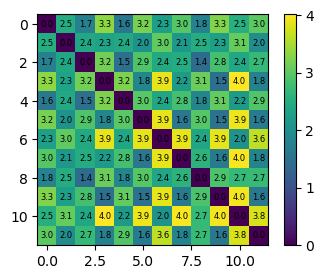

9 vs 15 texture Distance Matrix for 9 and 15:


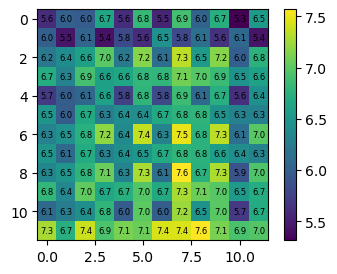

Maximum distance: 7.569981327671353
Minimum distance: 5.315919409228831


In [19]:
# cm=plot_distance(p1,p2,concat_feature_dict,"Concatenated")
# mm=plot_distance(p1,p2,minutia_feature_dict,"Minutiae")
feature_vector = minutia_feature_dict
feature_vector = concat_feature_dict
feature_vector = texture_feature_dict
tm=plot_distance(p1,p1,feature_vector,f"{p1} vs {p1} texture")
tm=plot_distance(p2,p2,feature_vector,f"{p2} vs {p2} texture")
tm=plot_distance(p1,p2,feature_vector,f"{p1} vs {p2} texture")
# print maximaum and minimum distance from  distance matrix

print("".center(50, "="))
print("Maximum distance:", np.max(tm))
print("Minimum distance:", np.min(tm))


Texture Distance Matrix for 2 and 2:


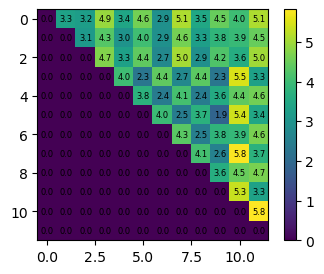

In [213]:
p1,p2 = 2,2
# cm=plot_distance(p1,p2,concat_feature_dict,"Concatenated")
# mm=plot_distance(p1,p2,minutia_feature_dict,"Minutiae")
tm=plot_distance(p1,p2,texture_feature_dict,"Texture")

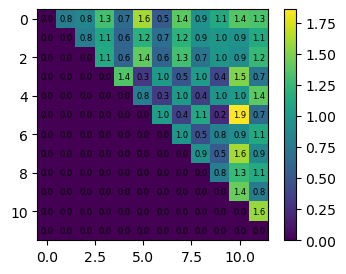

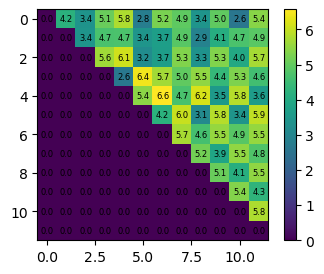

In [214]:
plot_distance_mat(cm-mm)
plot_distance_mat(cm-tm)
# plot_distance_mat(mm-tm)

In [43]:
!pip install scipy

In [48]:
import numpy as np
from scipy.signal import medfilt2d
import random

def gram_schmidt(vectors):
    # Gram-Schmidt orthogonalization
    num_vectors, vector_length = vectors.shape
    orthogonalized_vectors = np.zeros((num_vectors, vector_length))
    orthogonalized_vectors[0] = vectors[0]  # The first vector remains the same

    for i in range(1, num_vectors):
        projection = np.zeros(vector_length)
        for j in range(i):
            projection += (np.dot(vectors[i], orthogonalized_vectors[j]) / np.dot(orthogonalized_vectors[j], orthogonalized_vectors[j])) * orthogonalized_vectors[j]
        orthogonalized_vectors[i] = vectors[i] - projection

    return orthogonalized_vectors

def generate_random_polynomial(degree, C, sigma):
    # Generate random coefficients for the polynomial within the specified range
    coefficients = [random.uniform(-C * sigma, C * sigma) for _ in range(degree + 1)]
    
    # Ensure that the coefficient for the cubic term (a3) is nonzero
    while coefficients[3] == 0:
        coefficients[3] = random.uniform(-C * sigma, C * sigma)
    
    def polynomial(x):
        result = 0
        for i in range(degree + 1):
            result += coefficients[i] * (x ** i)
        return result
    
    return polynomial

def bio_code_generation(T, mu, sigma, C, Seed, m, threshold=0):
    n = len(T)
    T_tilde = (T - mu) * sigma

    # Generate m random polynomials and evaluate them for each template
    polynomials = [generate_random_polynomial(3, C, sigma) for _ in range(m)]
    P = np.zeros((m, n))
    
    for i in range(m):
        for j in range(n):
            P[i, j] = np.cos(polynomials[i](T_tilde[j]))
    
    # print("P:", P)
    # Gram-Schmidt orthogonalization
    orthogonalized_P = gram_schmidt(P)
    # print("orthogonalized_P:", orthogonalized_P)
    orthogonalized_P = np.array(orthogonalized_P)

    # Apply a 2D median filter
    filtered_matrix = medfilt2d(orthogonalized_P, kernel_size=3)  # Adjust the kernel size as needed

    # Print the filtered matrix (random matrix)
    print("Filtered Matrix (Random Matrix):")
    # print(filtered_matrix)
    # Compute xi values
    xi_values = np.dot(T, orthogonalized_P.T)
    print("xi_values:", xi_values.shape)
    # Compute BioCode based on the threshold
    BioCode = np.where(xi_values >= threshold, 1, 0)

    return BioCode

# Example usage:
# Replace these with your actual biometric templates (T), average (mu), standard deviation (sigma),
# and other parameters as needed
# T = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
T = np.array(feature)
mu = np.mean(T)
sigma = np.std(T)
C = 1.0  # Adjust this value as needed
Seed = 12346
m = 256  # Number of polynomials
threshold = 0  # You can adjust the threshold as needed

BioCode = bio_code_generation(T, mu, sigma, C, Seed, m, threshold)
print("BioCode:", BioCode)


Filtered Matrix (Random Matrix):
xi_values: (256,)
BioCode: [1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1
 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1]


In [57]:
import numpy as np
import random

def oph_hash(u, K):
    D = len(u)
    d = D // K

    # Create a permutation of [D] with a fixed seed
    seed = 42  # You can use any seed value
    np.random.seed(seed)
    permutation = np.random.permutation(D)

    # Initialize the hash values to a placeholder (E)
    hash_values = [float('inf')] * K

    for k in range(K):
        # Calculate the bin boundaries
        start = k * d
        end = (k + 1) * d

        # Find the elements in the bin Bk
        bin_indices = [i for i in range(D) if start <= permutation[i] < end]

        if bin_indices:
            # If the bin is non-empty, find the minimum index where u[j] != 0
            min_index = min(bin_indices, key=lambda j: u[j] if u[j] != 0 else float('inf'))
            hash_values[k] = permutation[min_index]

    return hash_values

# Example usage:
D = 100  # Length of binary vector
K = 16    # Number of hash values
# binary_vector = [random.choice([0, 1]) for _ in range(D)]
binary_vector = BioCode
hash_values = oph_hash(binary_vector, K)
print("Binary Vector:", binary_vector)
print("OPH Hash Values:", hash_values)


Binary Vector: [1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1
 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1]
OPH Hash Values: [9, 28, 33, 55, 79, 85, 104, 126, 139, 148, 167, 185, 201, 217, 228, 245]


In [54]:
import numpy as np

def random_permutation(X, permutation_set):
    # Apply random permutation to the feature vector X
    permuted_X = np.copy(X)
    for i in range(len(permutation_set)):
        permuted_X = permuted_X[:, permutation_set[i]]

    return permuted_X

def pairwise_inner_product(X, p):
    n, d = X.shape
    hadamard_product = np.zeros((n, n, d))

    for i in range(p):
        for j in range(p):
            if i != j:
                hadamard_product += np.multiply.outer(X[i], X[j])

    return hadamard_product

def max_index_hash_code(X, k):
    n, d = X.shape
    max_index = np.zeros((d, k), dtype=int)

    for j in range(k):
        max_indices = np.argmax(X, axis=0)  # Find max index along axis 0
        max_index[:, j] = max_indices
        # Set the max value to a very low value to find the next max in the next iteration
        X[max_indices, np.arange(n)] = -np.inf

    return max_index

# Example usage:
# Replace the following with your actual data and parameters
n = 100  # Number of samples
d = 50   # Dimension of the feature vector
p = 10   # Number of random permutations
m = 5    # Length of the hash code
k = 3    # Window size

# Generate some random data for demonstration
X = np.random.rand(d, n)  # Note the transposed dimensions here
permutation_set = [np.random.permutation(d) for _ in range(p)]

# Step 2: Randomly permute the original feature
permuted_X = random_permutation(X, permutation_set)

# Step 4: Calculate the pairwise inner product
hadamard_product = pairwise_inner_product(permuted_X, p)

# Step 5: Concatenate the Hadamard product vectors
concatenated_vectors = hadamard_product.reshape((n, -1))

# Step 6: Randomly select a Hadamard inner product value vector
random_permutation_vector = permutation_set[np.random.randint(p)]

# Step 7: Select a window of size k and record the maximum index
max_index = max_index_hash_code(concatenated_vectors.T, k)  # Transpose the matrix for correct indexing

print("Max Index Hash Code:")
print(max_index)


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (100,) (1250,) 

In [16]:
# apply random permutation on features
np.random.shuffle(feature)
# convert feature into one dimenesional array
feature = feature.flatten()
print(feature.shape)
# find average value of feature
feature_mean = np.mean(feature)
# find standard deviation of feature
feature_std = np.std(feature)
# normalize feature
feature = (feature - feature_mean) * feature_std
print(feature)

(512,)
[ 1.0112605e+00  2.8249891e+00 -6.8325067e-01 -4.3688557e-01
 -3.9941701e-01 -6.0682583e-01 -6.8325067e-01 -6.8325067e-01
  1.0845059e+00  2.1025039e-01 -6.8325067e-01 -6.8325067e-01
 -6.8325067e-01  1.3197564e+00  7.2439492e-01 -6.8325067e-01
 -6.8325067e-01 -6.8325067e-01  5.3747338e-01 -5.1500463e-01
  1.3620687e+00 -6.8325067e-01  9.1279685e-01 -6.8325067e-01
 -6.8325067e-01  8.4419495e-01 -6.8325067e-01 -6.8325067e-01
 -6.8325067e-01 -6.8325067e-01 -6.8325067e-01  3.5208810e-02
 -6.8325067e-01 -6.8325067e-01 -6.8325067e-01 -6.8325067e-01
  6.9356757e-01  1.3313946e+00 -6.8325067e-01  4.7178891e-01
  2.6048470e+00 -6.8325067e-01 -6.8325067e-01 -6.8325067e-01
 -6.8325067e-01  2.2545114e+00 -6.8325067e-01 -6.8325067e-01
  2.5574691e+00 -6.8325067e-01  1.4710443e+00  2.0965240e+00
 -6.8325067e-01  1.4653634e+00 -6.8325067e-01 -6.8325067e-01
 -6.8325067e-01 -6.8325067e-01 -6.8325067e-01 -6.8325067e-01
 -6.8325067e-01 -6.8325067e-01 -6.8325067e-01 -5.3403765e-01
 -6.8325067e-01 -

In [19]:
# take a seed value
seed = 1
# set seed value for numpy
np.random.seed(seed)
# generate with the seed of m polynomial pk with k = 1:m
m = 512
k = 3
# evluate pki = cos(pk(feature)), i = 1:n, k = 1:m
polynomial = np.cos(np.dot(feature, np.random.randint(0, 2, (m, k))))
print(polynomial)
# generate random polynomial
# polynomial = np.random.randint(0, 2, (m, k))
# print(polynomial)

[ 0.6886746  -0.48652667 -0.0552603 ]


In [24]:
import random

def generate_random_polynomial(degree, C, sigma):
    # Generate random coefficients for the polynomial within the specified range
    coefficients = [random.uniform(-C * sigma, C * sigma) for _ in range(degree + 1)]
    
    # Ensure that the coefficient for the cubic term (a3) is nonzero
    while coefficients[3] == 0:
        coefficients[3] = random.uniform(-C * sigma, C * sigma)
    
    def polynomial(x):
        result = 0
        for i in range(degree + 1):
            result += coefficients[i] * (x ** i)
        return result
    
    return polynomial

# Example usage:
degree = 3
C = 1.0  # Adjust this value as needed
sigma = 1.0  # Adjust this value as needed

polynomial = generate_random_polynomial(degree, C, sigma)
x = 2.0  # Input value for the polynomial
result = polynomial(x)
print(f"P(x) = {result}")


P(x) = -2.552935608821902


In [13]:
import numpy as np

def random_permutation(vector):
    return np.random.permutation(vector)

def calculate_hashvec(v, T, permutation_set):
    hashvec = np.zeros_like(v)
    for i in range(len(v)):
        hashvec[i] = v[permutation_set[i]]
    return hashvec

def shift_ordering(components, k):
    ordered_components = np.zeros_like(components)
    for i in range(components.shape[0]):
        ordered_components[i] = np.roll(components[i], i)
    return ordered_components

def construct_final_hash(components):
    final_hash = np.zeros(components.shape[1])
    for i in range(components.shape[1]):
        final_hash[i] = np.argmax(components[:, i])
    return final_hash

# Initialize inputs and parameters
v = np.array([1, 2, 3, 4, 5])
T = np.random.rand(5, 5)
n = 3
Sk_low = 1
Sk_high = 5
k = 2
Hashvec = np.zeros((n, n))
Numperm = 5

# Stage 1: Permuting the vector elements
for i in range(Numperm):
    permutation_set = random_permutation(len(v))
    v_permuted = random_permutation(v)
    T_permuted = random_permutation(T)
    hashvec = calculate_hashvec(v_permuted, T_permuted, permutation_set)
    
    # Stage 2: Shift-ordering
    ordered_components = shift_ordering(hashvec, k)
    
    # Stage 3: Constructing the final hash
    final_hash = construct_final_hash(ordered_components)
    
    # Print or store the final hash for this permutation set
    print(final_hash)


IndexError: tuple index out of range

In [14]:
import numpy as np

def random_permutation(vector):
    return np.random.permutation(vector)

def one_permutation_hashing(v):
    # Generate a random permutation set
    permutation_set = random_permutation(len(v))
    
    # Permute the vector based on the permutation set
    v_permuted = v[permutation_set]
    
    # Calculate the hash code (e.g., by taking the mean of the permuted vector)
    h = np.mean(v_permuted)
    
    return h

# Initialize your vector
v = np.array([1, 2, 3, 4, 5])

# Perform one permutation hashing
hash_code = one_permutation_hashing(v)

# Print the resulting hash code
print("Hash Code:", hash_code)


Hash Code: 3.0


In [17]:
import numpy as np

def random_permutation(vector):
    return np.random.permutation(vector)

def n_permutation_hashing(v, n):
    hash_codes = []
    for _ in range(n):
        # Generate a random permutation set
        permutation_set = random_permutation(len(v))
        
        # Permute the vector based on the permutation set
        v_permuted = v[permutation_set]
        
        # Calculate the hash code (e.g., by taking the mean of the permuted vector)
        h = np.mean(v_permuted)
        
        # Append the hash code to the list
        hash_codes.append(h)
    
    return hash_codes

# Initialize your vector
v = np.array([12, 21, 32, 41, 54])

# Define the number of permutations
n_permutations = 7

# Perform n permutation hashing
hash_codes = n_permutation_hashing(v, n_permutations)

# Print the resulting hash codes
print("Hash Codes:", hash_codes)


Hash Codes: [32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0]


In [20]:
# apply one permutation hashing on features
n_permutations = 7
hash_code = n_permutation_hashing(feature,n_permutations)
print(hash_code)

[0.36858237, 0.36858237, 0.36858237, 0.36858237, 0.36858237, 0.36858237, 0.36858237]


In [28]:
import numpy as np
from scipy.linalg import hadamard

# Define parameters
r = 256  # Length of row vector P
n = 8    # Number of repetitions
l = 1024 # Number of bins
N = 2**n # Dimension of X

# Step 1: Augmented Feature Vector (X = RN)
original_feature_vector = np.random.rand(N)
cephalic_feature_element = np.random.rand(1)
X = np.concatenate((feature, cephalic_feature_element))

# Step 2: Partial Haar Submatrix Construction (H˜)
P = np.random.permutation(range(1, N + 1))[:r]  # Random row vector P
H = hadamard(N)
H_hat = H[P - 1]

# Step 3: Cancelable and Compact Binary Codes Generation
x_hat = np.dot(X[:r], H_hat)  # Partial Haar Transform (Note the dimension adjustment)
extended_feature_vector = np.tile(x_hat, (n - 1, 1))  # Repeated augmentation
π = np.random.permutation(N)  # Random permutation seed
extended_feature_vector_permuted = extended_feature_vector[:, π]

# Initialize variables to store binary codes
binary_codes = np.zeros((l,))

# Ensure the bin size is a whole number
bin_size = r // l

# Iterate through bins
for i in range(l):
    bin_i = extended_feature_vector_permuted[i * bin_size : (i + 1) * bin_size]
    if bin_i.size > 0:
        min_index = np.argmin(bin_i)
        binary_codes[i] = min_index

# Convert binary codes to a concatenated string
binary_code_string = ''.join([str(int(code)) for code in binary_codes])

# Print the binary code
print("Binary Code:", binary_code_string)


Binary Code: 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
# code for Circulant Minwise Hashing (C-MinHash)
# Algorithm 7 Consistent Weighted Sampling (CWS)
# Input: Non-negative data vector u ∈ RD+
# Output: Consistent weighted sampling hash h∗ = (i∗, t∗)
# 1: for every non-zero vi do
# 2: ri ∼ Gamma(2, 1), ci ∼ Gamma(2, 1), βi ∼ Uniform(0, 1)
# 3: ti ← ⌊log ui
# ri
# + βi⌋, yi ← exp(ri(ti − βi))
# 4: ai ← ci/(yi exp(ri))
# 5: end for
# 6: i∗ ← argmini ai, t∗ ← ti∗


import numpy as np
from scipy.linalg import hadamard
